In [144]:
import pandas as pd
import seaborn as sns
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [145]:
cars = pd.read_csv('./car_train.csv')

In [146]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38506 entries, 0 to 38505
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rownum            38506 non-null  int64  
 1   price             38503 non-null  float64
 2   acquisition_date  38506 non-null  object 
 3   badge             36933 non-null  object 
 4   body_type         38504 non-null  object 
 5   category          36018 non-null  object 
 6   colour            36545 non-null  object 
 7   cylinders         36018 non-null  float64
 8   economy           34586 non-null  float64
 9   fuel              38478 non-null  object 
 10  last_updated      38506 non-null  object 
 11  litres            36018 non-null  float64
 12  location          38506 non-null  int64  
 13  make              38506 non-null  object 
 14  model             38506 non-null  object 
 15  odometer          36956 non-null  float64
 16  transmission      38499 non-null  object

In [147]:
cars.head(10)

rownum    price acquisition_date         badge body_type category  colour  \
0       0   8560.0       2017-06-22            RS     Hatch     Used  Silver   
1       3  17074.0       2017-06-22          2.0i     Hatch     Used  Silver   
2       4   8526.0       2017-06-22             R     Hatch     Used    Blue   
3       5  10952.0       2017-06-22             R     Hatch     Used   Black   
4       6  33964.0       2017-06-22       WRX STI     Sedan     Used    Grey   
5       8  18070.0       2017-06-22        2.0i-S     Hatch     Used   Black   
6       9  12019.0       2017-06-22            RS     Sedan     Used    Grey   
7      10  10860.0       2017-06-22             R     Sedan  Private     Red   
8      11  12997.0       2017-06-22            RS     Sedan     Used  Silver   
9      12  30216.0       2017-06-22  2.0i Premium     Hatch    Other     Red   

   cylinders  economy      fuel last_updated  litres  location    make  \
0        4.0      8.9  Unleaded   2017-06-22     2.0         2  Subaru   
1        4.0      6.8  Unleaded   2017-06-22     2.0         3  Subaru   
2        4.0      8.9  Unleaded   2017-06-22     2.0         6  Subaru   
3        4.0      8.8  Unleaded   2017-06-22     2.0         8  Subaru   
4        4.0     10.5  Unleaded   2017-06-22     2.5         3  Subaru   
5        4.0      6.8  Unleaded   2017-06-22     2.0         7  Subaru   
6        4.0      8.9  Unleaded   2017-06-22     2.0         3  Subaru   
7        4.0      8.8  Unleaded   2017-06-22     2.0         2  Subaru   
8        4.0      8.9  Unleaded   2017-06-22     2.0         2  Subaru   
9        4.0      6.6  Unleaded   2017-06-22     2.0         1  Subaru   

     model  odometer transmission  year  
0  Impreza  134944.0       Manual  2009  
1  Impreza   33304.0    Automatic  2014  
2  Impreza   81668.0       Manual  2007  
3  Impreza   48051.0    Automatic  2009  
4  Impreza   51516.0       Manual  2011  
5  Impreza   60294.0    Automatic  2012  
6  Impreza   96160.0       Manual  2009  
7  Impreza  103380.0    Automatic  2011  
8  Impreza   88631.0       Manual  2008  
9  Impreza     213.0    Automatic  2017

In [148]:
X

array([2009, 2014, 2007, ..., 2006, 2010, 2014])

In [149]:
X = X.reshape(-1, 1)
X

array([[2009],
       [2014],
       [2007],
       ...,
       [2006],
       [2010],
       [2014]])

In [151]:
cars = cars[cars['price'] > 1][cars['price'] < 100000]
cars

rownum    price acquisition_date                        badge  \
0           0   8560.0       2017-06-22                           RS   
1           3  17074.0       2017-06-22                         2.0i   
2           4   8526.0       2017-06-22                            R   
3           5  10952.0       2017-06-22                            R   
4           6  33964.0       2017-06-22                      WRX STI   
...       ...      ...              ...                          ...   
38501   53452  38036.0       2017-06-21               2.5i-S CVT AWD   
38502   53453  39913.0       2017-06-21               2.5i-S CVT AWD   
38503   53455   6061.0       2017-06-22                          NaN   
38504   53456  13980.0       2017-06-22              RS (AWD) LTD ED   
38505   53459  27952.0       2017-06-22  2.5i LUXURY LIMITED EDITION   

      body_type category  colour  cylinders  economy      fuel last_updated  \
0         Hatch     Used  Silver        4.0      8.9  Unleaded   2017-06-22   
1         Hatch     Used  Silver        4.0      6.8  Unleaded   2017-06-22   
2         Hatch     Used    Blue        4.0      8.9  Unleaded   2017-06-22   
3         Hatch     Used   Black        4.0      8.8  Unleaded   2017-06-22   
4         Sedan     Used    Grey        4.0     10.5  Unleaded   2017-06-22   
...         ...      ...     ...        ...      ...       ...          ...   
38501       Suv      NaN  Silver        NaN      NaN  Unleaded   2017-06-21   
38502       Suv      NaN   White        NaN      NaN  Unleaded   2017-06-21   
38503     Hatch      NaN  Silver        NaN      NaN       NaN   2017-06-27   
38504     Hatch      NaN    Blue        NaN      NaN  Unleaded   2017-06-27   
38505     Wagon      NaN    Grey        NaN      NaN  Unleaded   2017-06-27   

       litres  location    make     model  odometer transmission  year  
0         2.0         2  Subaru   Impreza  134944.0       Manual  2009  
1         2.0         3  Subaru   Impreza   33304.0    Automatic  2014  
2         2.0         6  Subaru   Impreza   81668.0       Manual  2007  
3         2.0         8  Subaru   Impreza   48051.0    Automatic  2009  
4         2.5         3  Subaru   Impreza   51516.0       Manual  2011  
...       ...       ...     ...       ...       ...          ...   ...  
38501     NaN         1  Subaru  Forester   29128.0    Automatic  2016  
38502     NaN         1  Subaru  Forester    8334.0    Automatic  2015  
38503     NaN         1  Subaru   Impreza     108.0       Manual  2006  
38504     NaN         1  Subaru   Impreza   98799.0       Manual  2010  
38505     NaN         1  Subaru  Forester   65236.0    Automatic  2014  

[38490 rows x 18 columns]

In [152]:
X = cars['year'].values
y = cars['price'].values.astype(int)

In [153]:
y
print(bad_data_points)

[-9223372036854775808, -9223372036854775808, -9223372036854775808, 1300067, 150045, 895068, 182501, 450610, 800013, 380043, 112984, 1300076, 1300072, 215095, 1300006, 12345760]


In [165]:
least_expensive = y.min()
most_expensive = y.max()
print(least_expensive)
print(most_expensive)

33
57132


In [166]:
oldest_car = X.min()
newest_car = X.max()
print(oldest_car)
print(newest_car)

1993
2018


In [157]:
print(f')

2018

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)

In [159]:
print(f"X_train shape [{x_train.shape}")
print(f"y_train shape [{y_train.shape}")
print(f"X_test shape [{x_test.shape}")
print(f"y_test shape [{y_test.shape}")

X_train shape [(30792,)
y_train shape [(30792,)
X_test shape [(7698,)
y_test shape [(7698,)


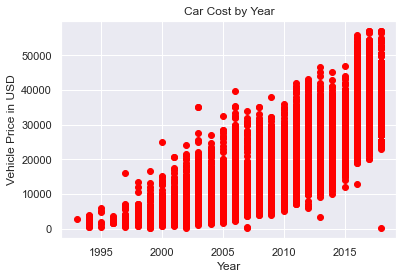

In [160]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Year')
plt.ylabel('Vehicle Price in USD')
plt.title('Car Cost by Year')
plt.show()

<AxesSubplot:xlabel='year', ylabel='price'>

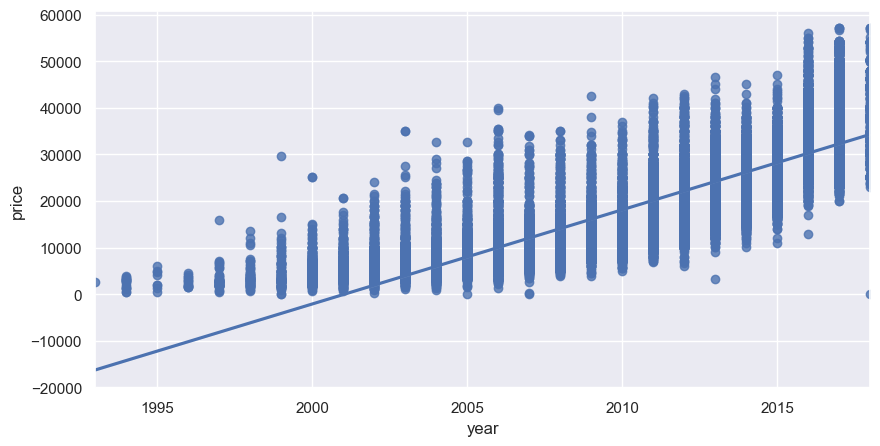

In [161]:
sns.set()
plt.figure(figsize = (10, 5), dpi = 100)
sns.regplot(x = 'year', y = 'price', data = cars)

<AxesSubplot:xlabel='year'>

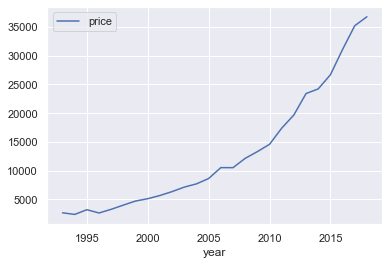

In [163]:
new_dataframe = cars[['year', 'price']].groupby(['year']).mean()
# new_dataframe.head()
new_dataframe.plot(y = 'price')

In [164]:
cars[['year', 'price']].head()

year    price
0  2009   8560.0
1  2014  17074.0
2  2007   8526.0
3  2009  10952.0
4  2011  33964.0